In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
df=pd.read_csv('/Users/alvina/cars_cleaned.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361516 entries, 0 to 361515
Data columns (total 14 columns):
price           361516 non-null int64
year            361516 non-null float64
manufacturer    361516 non-null object
model           361516 non-null object
condition       361516 non-null object
cylinders       361516 non-null object
fuel            361516 non-null object
odometer        361516 non-null float64
title_status    361516 non-null object
transmission    361516 non-null object
drive           361516 non-null object
size            361516 non-null object
type            361516 non-null object
paint_color     361516 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 38.6+ MB


### Looking in to info() output, we can see that all attributes other than 'price','year','odometer' are categorical in nature. Let's change that by using label encoder from sklearn.

In [4]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer', 'model', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']] = df[['manufacturer', 'model', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361516 entries, 0 to 361515
Data columns (total 14 columns):
price           361516 non-null int64
year            361516 non-null float64
manufacturer    361516 non-null int64
model           361516 non-null int64
condition       361516 non-null int64
cylinders       361516 non-null int64
fuel            361516 non-null int64
odometer        361516 non-null float64
title_status    361516 non-null int64
transmission    361516 non-null int64
drive           361516 non-null int64
size            361516 non-null int64
type            361516 non-null int64
paint_color     361516 non-null int64
dtypes: float64(2), int64(12)
memory usage: 38.6 MB


### Splitting of test and train data

In [6]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(289212, 13) (289212,)
(72304, 13) (72304,)


### Feature Scaling: 
##### Machine learning algorithms don't perform well when the input numerical attributes are of different scales. There are two common ways to get all attributes at a same scale. 
##### - Min-Max Scaling (Also called Normalisation)
##### - Standardisation
##### In Min-Max scaling, the values are shifted and rescaled ranging between 0 and 1. This is done by subtracting the min value and dividing by max minus min. Scikitlearn library have a transformer called Minmaxscaler for this. In standardization it subtracts the mean value, and divided by variance so that resulting distribution has unit variance. However, standardisation is much less affected by outliers.


In [7]:
##plt.hist(X)
##plt.show()

In [8]:
##airlines= df[['manufacturer', 'model', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']]


##airlines.plot.kde()

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [10]:
X_train

array([[0.71428571, 0.95121951, 0.88393711, ..., 0.33333333, 0.83333333,
        0.45454545],
       [0.45714286, 0.82926829, 0.71481581, ..., 0.33333333, 0.83333333,
        0.72727273],
       [0.54285714, 0.09756098, 0.11265828, ..., 0.33333333, 0.75      ,
        0.        ],
       ...,
       [0.48571429, 0.95121951, 0.93466203, ..., 0.33333333, 0.75      ,
        0.72727273],
       [0.71428571, 0.17073171, 0.33939023, ..., 0.33333333, 0.66666667,
        0.81818182],
       [0.45714286, 0.34146341, 0.42393175, ..., 0.33333333, 0.        ,
        0.90909091]])

### Random Forest


#### Apart from decision trees which searches for very best feature while splitting a node, Random Forest searches for best feature among a random subset of features. Instead of buliding a BaggingClassifier and passing it to a DecisionTreeClassifier ,we can use a RandomForest.

In [27]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

In [29]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2121.42
Mean Squared Error: 15525129.48
Root Mean Squared Error: 3940.19


#### Let's try with more number of trees and peek in to accuracy.

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [31]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2041.17
Mean Squared Error: 14705345.22
Root Mean Squared Error: 3834.75


#### We can see reduction in value of RMSE.


In [32]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [33]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


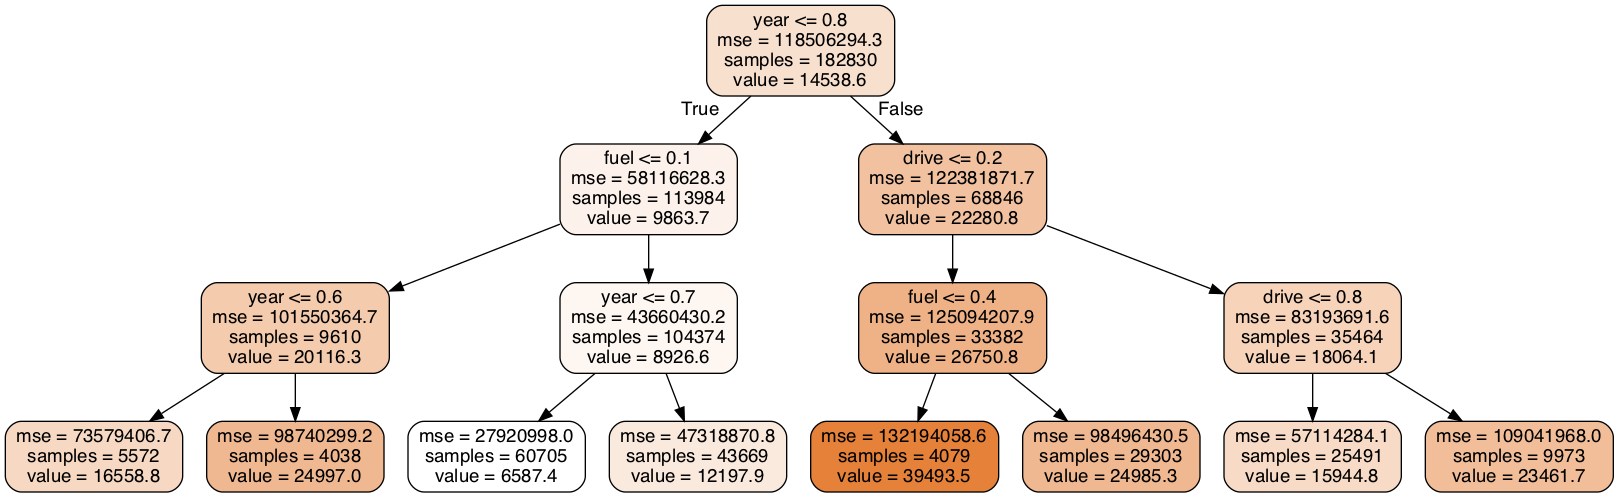

In [34]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

In [35]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.38
Variable: odometer             Importance: 0.14
Variable: model                Importance: 0.12
Variable: fuel                 Importance: 0.1
Variable: drive                Importance: 0.1
Variable: manufacturer         Importance: 0.06
Variable: cylinders            Importance: 0.03
Variable: type                 Importance: 0.02
Variable: paint_color          Importance: 0.02
Variable: condition            Importance: 0.01
Variable: title_status         Importance: 0.01
Variable: transmission         Importance: 0.01
Variable: size                 Importance: 0.01


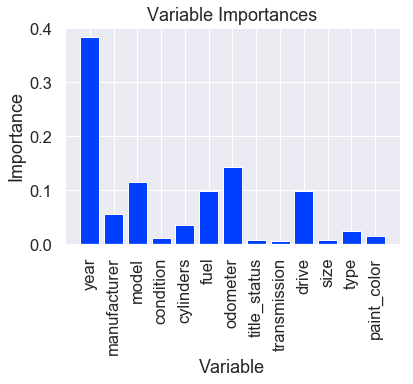

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('seaborn-bright')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

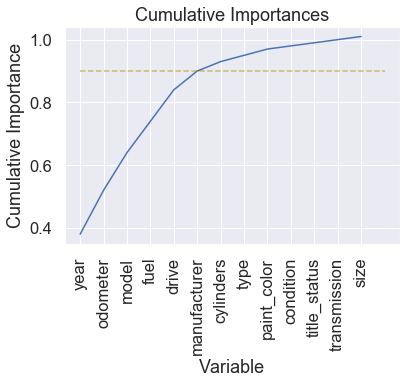

In [37]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'b-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'y', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [38]:
# Find number of features for cumulative importance of 90%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 7


In [39]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [40]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('drive'), 
                     feature_list.index('odometer'), feature_list.index('fuel'),
                     feature_list.index('model')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [41]:

rf_most_important.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [ ]:
predictions = rf_most_important.predict(test_important)

In [42]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 6560.28
Mean Squared Error: 97760513.68
Root Mean Squared Error: 9887.39


In [43]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

No handles with labels found to put in legend.


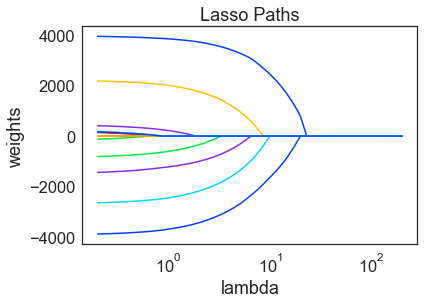

In [44]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [45]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),2))

Best alpha using built-in LassoCV: 0.011426
Best score using built-in LassoCV: 0.521660
Root Mean Squared Error: 7451.55


In [46]:
y_pred = reg.predict(X_test)

In [47]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 5330.77
Mean Squared Error: 55525588.3
Root Mean Squared Error: 7451.55


Text(0.5, 1.0, 'Feature importance using Lasso Model')

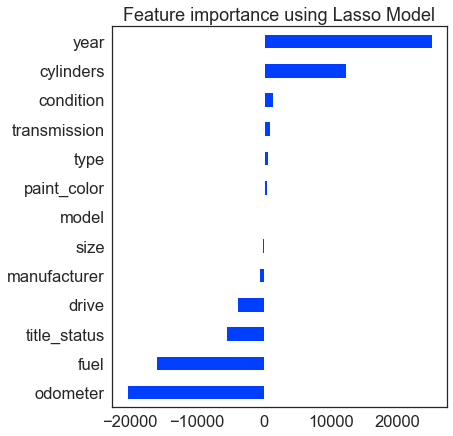

In [48]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [49]:
lasso001 = Lasso(alpha=100, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=100:", train_score001)
print ("test score for alpha =100: ", test_score001)
print ("number of features used: for alpha =100: ", coeff_used001)

training score for alpha=100: 0.5060004737715351
test score for alpha =100:  0.5076582328156611
number of features used: for alpha =100:  7


### KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [51]:
rmse_val2 = [] #to store rmse values for different k
for K in range(10):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6494.8174612948515
RMSE value for k=  2 is: 5913.291239572572
RMSE value for k=  3 is: 5770.010900854276
RMSE value for k=  4 is: 5711.939234379802
RMSE value for k=  5 is: 5694.011030143349
RMSE value for k=  6 is: 5691.472060615637
RMSE value for k=  7 is: 5690.730504458756
RMSE value for k=  8 is: 5690.860874061178
RMSE value for k=  9 is: 5692.48866518328
RMSE value for k=  10 is: 5701.951479073049


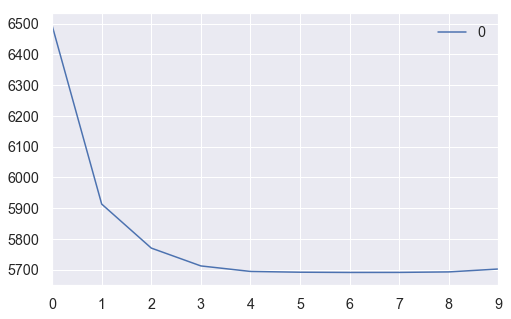

In [52]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [53]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [54]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1261617614516486


In [55]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Mean Absolute Error: 4334.97
Mean Squared Error: 53694631.65
Root Mean Squared Error: 7327.66
Accuracy: 12.62 %


#### XGBOOST

In [56]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [13]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[18:00:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 9887.391652


In [14]:
# fit model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

predictions = xg_reg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[18:01:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [16]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 6560.28
Mean Squared Error: 97760513.68
Root Mean Squared Error: 9887.39


In [17]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[18:20:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:20:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
A, b = X.iloc[:,:-1],X.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=A,label=b)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[18:22:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:22:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:22:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [19]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[18:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


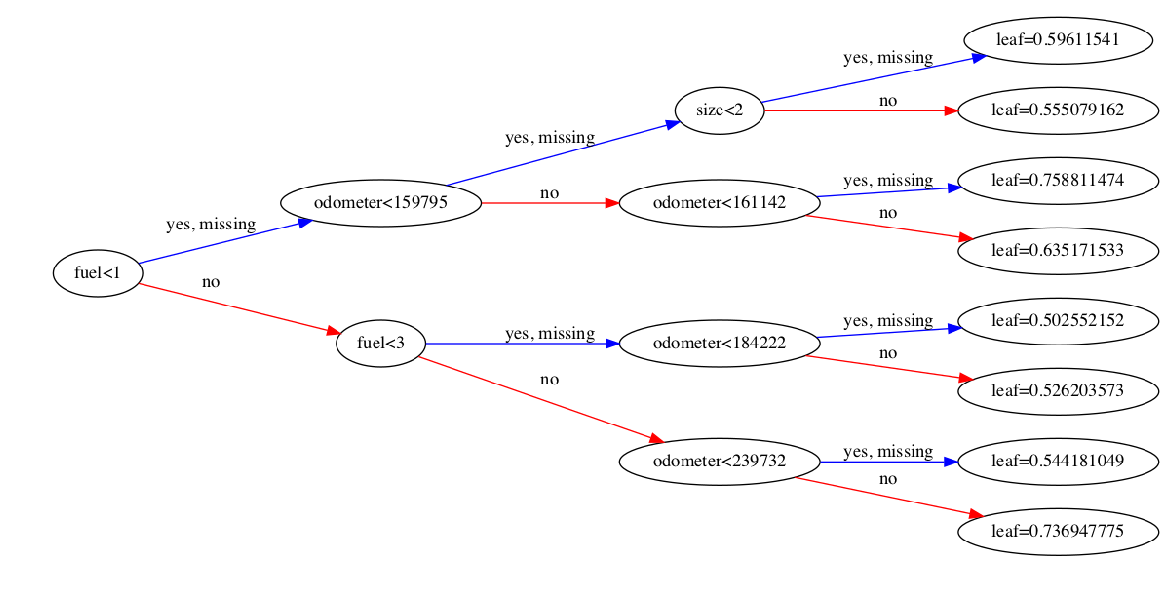

In [24]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,rankdir='LR', num_trees=0)
plt.rcParams['figure.figsize'] = [60,80]
plt.show()

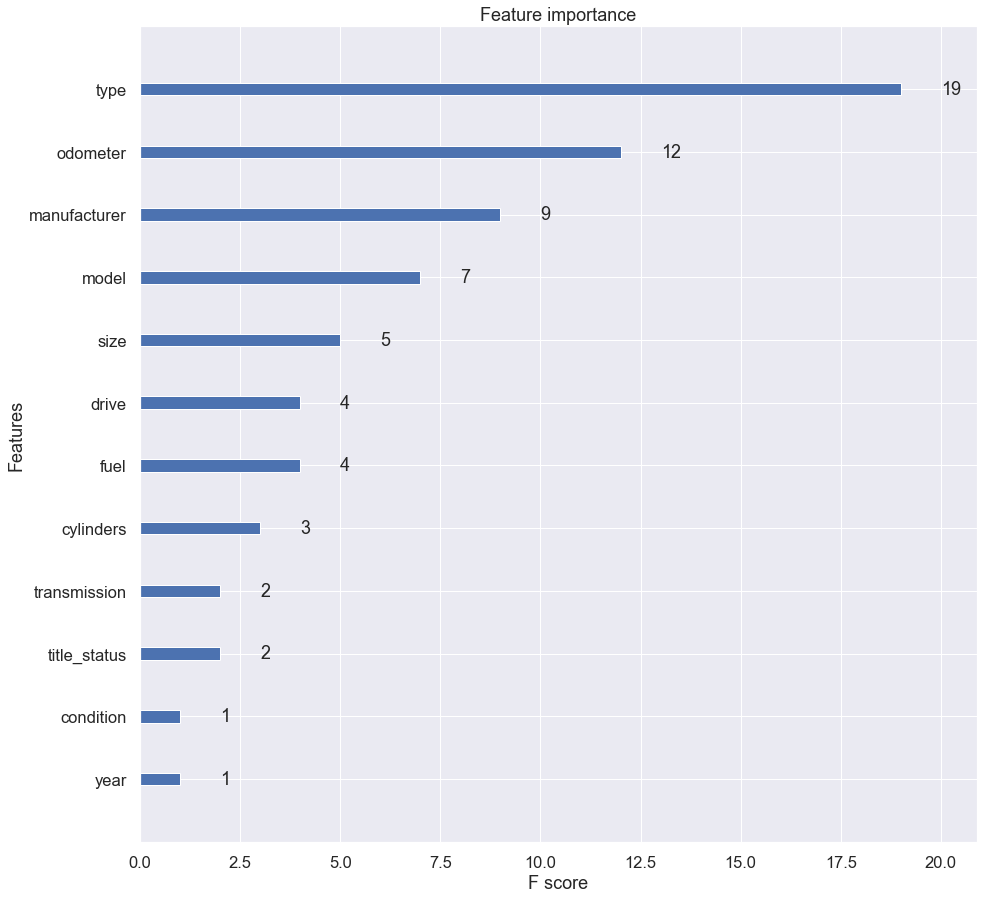

In [26]:
import seaborn as sns
xgb.plot_importance(xg_reg)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [9, 9]
plt.show()